# Importing file needed

First of all import the csv file using either "docker cp" command or the upload fonction :

- docker cp [OPTIONS] CONTAINER:SRC_PATH DEST_PATH|-
- ocker cp [OPTIONS] SRC_PATH|- CONTAINER:DEST_PATH
- docker cp Code/09.Spark/survey.csv 311c58a8572f:./
- docker cp Code/09.Spark/survey.csv 311c58a8572f:home/jovyan/datasource

In [1]:
!head -n 2 ../datasource/survey.csv 

"Timestamp","Age","Gender","Country","state","self_employed","family_history","treatment","work_interfere","no_employees","remote_work","tech_company","benefits","care_options","wellness_program","seek_help","anonymity","leave","mental_health_consequence","phys_health_consequence","coworkers","supervisor","mental_health_interview","phys_health_interview","mental_vs_physical","obs_consequence","comments"
2014-08-27 11:29:31,37,"Female","United States","IL",NA,"No","Yes","Often","6-25","No","Yes","Yes","Not sure","No","Yes","Yes","Somewhat easy","No","No","Some of them","Yes","No","Maybe","Yes","No",NA


# Spark Session

In [2]:
from pyspark.sql import SparkSession

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore")

In [3]:
spark = SparkSession \
    .builder \
    .appName("_Practical_Spark_Ex") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.read.csv("../datasource/survey.csv", header=True, sep=",");

df.limit(3).collect()

[Row(Timestamp='2014-08-27 11:29:31', Age='37', Gender='Female', Country='United States', state='IL', self_employed='NA', family_history='No', treatment='Yes', work_interfere='Often', no_employees='6-25', remote_work='No', tech_company='Yes', benefits='Yes', care_options='Not sure', wellness_program='No', seek_help='Yes', anonymity='Yes', leave='Somewhat easy', mental_health_consequence='No', phys_health_consequence='No', coworkers='Some of them', supervisor='Yes', mental_health_interview='No', phys_health_interview='Maybe', mental_vs_physical='Yes', obs_consequence='No', comments='NA'),
 Row(Timestamp='2014-08-27 11:29:37', Age='44', Gender='M', Country='United States', state='IN', self_employed='NA', family_history='No', treatment='No', work_interfere='Rarely', no_employees='More than 1000', remote_work='No', tech_company='No', benefits="Don't know", care_options='No', wellness_program="Don't know", seek_help="Don't know", anonymity="Don't know", leave="Don't know", mental_health_con

Prior Spark 2.0, Spark Context was the entry point of any spark application and used to access all spark features and needed a sparkConf which had all the cluster configs and parameters to create a Spark Context object. We could primarily create just RDDs using Spark Context and we had to create specific spark contexts for any other spark interactions. For SQL SQLContext, hive HiveContext, streaming Streaming Application. In a nutshell, Spark session is a combination of all these different contexts. Internally, Spark session creates a new SparkContext for all the operations and also all the above-mentioned contexts can be accessed using the SparkSession object.

https://medium.com/@achilleus/spark-session-10d0d66d1d24

other option : create a context, than a session

In [ ]:
import pyspark
from pyspark.sql import SparkSession

sc = pyspark.SparkContext('local[*]')
spark = SparkSession(sc)

df = spark.read.csv('../datasource/survey.csv')
df.collect()

# Dataframe view

In [5]:
#df.show()

# Basic methods to retrieve infos

In [7]:
df.first()

Row(Timestamp='2014-08-27 11:29:31', Age='37', Gender='Female', Country='United States', state='IL', self_employed='NA', family_history='No', treatment='Yes', work_interfere='Often', no_employees='6-25', remote_work='No', tech_company='Yes', benefits='Yes', care_options='Not sure', wellness_program='No', seek_help='Yes', anonymity='Yes', leave='Somewhat easy', mental_health_consequence='No', phys_health_consequence='No', coworkers='Some of them', supervisor='Yes', mental_health_interview='No', phys_health_interview='Maybe', mental_vs_physical='Yes', obs_consequence='No', comments='NA')

In [8]:
df.take(2)

[Row(Timestamp='2014-08-27 11:29:31', Age='37', Gender='Female', Country='United States', state='IL', self_employed='NA', family_history='No', treatment='Yes', work_interfere='Often', no_employees='6-25', remote_work='No', tech_company='Yes', benefits='Yes', care_options='Not sure', wellness_program='No', seek_help='Yes', anonymity='Yes', leave='Somewhat easy', mental_health_consequence='No', phys_health_consequence='No', coworkers='Some of them', supervisor='Yes', mental_health_interview='No', phys_health_interview='Maybe', mental_vs_physical='Yes', obs_consequence='No', comments='NA'),
 Row(Timestamp='2014-08-27 11:29:37', Age='44', Gender='M', Country='United States', state='IN', self_employed='NA', family_history='No', treatment='No', work_interfere='Rarely', no_employees='More than 1000', remote_work='No', tech_company='No', benefits="Don't know", care_options='No', wellness_program="Don't know", seek_help="Don't know", anonymity="Don't know", leave="Don't know", mental_health_con

In [9]:
df.select("Timestamp","Age").limit(3).collect()

[Row(Timestamp='2014-08-27 11:29:31', Age='37'),
 Row(Timestamp='2014-08-27 11:29:37', Age='44'),
 Row(Timestamp='2014-08-27 11:29:44', Age='32')]

In [10]:
df.select("*")

DataFrame[Timestamp: string, Age: string, Gender: string, Country: string, state: string, self_employed: string, family_history: string, treatment: string, work_interfere: string, no_employees: string, remote_work: string, tech_company: string, benefits: string, care_options: string, wellness_program: string, seek_help: string, anonymity: string, leave: string, mental_health_consequence: string, phys_health_consequence: string, coworkers: string, supervisor: string, mental_health_interview: string, phys_health_interview: string, mental_vs_physical: string, obs_consequence: string, comments: string]

In [11]:
df.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- self_employed: string (nullable = true)
 |-- family_history: string (nullable = true)
 |-- treatment: string (nullable = true)
 |-- work_interfere: string (nullable = true)
 |-- no_employees: string (nullable = true)
 |-- remote_work: string (nullable = true)
 |-- tech_company: string (nullable = true)
 |-- benefits: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- wellness_program: string (nullable = true)
 |-- seek_help: string (nullable = true)
 |-- anonymity: string (nullable = true)
 |-- leave: string (nullable = true)
 |-- mental_health_consequence: string (nullable = true)
 |-- phys_health_consequence: string (nullable = true)
 |-- coworkers: string (nullable = true)
 |-- supervisor: string (nullable = true)
 |-- mental_health_interview: string (nullable = t

In [12]:
df.count()

1259

In [13]:
df.dtypes

[('Timestamp', 'string'),
 ('Age', 'string'),
 ('Gender', 'string'),
 ('Country', 'string'),
 ('state', 'string'),
 ('self_employed', 'string'),
 ('family_history', 'string'),
 ('treatment', 'string'),
 ('work_interfere', 'string'),
 ('no_employees', 'string'),
 ('remote_work', 'string'),
 ('tech_company', 'string'),
 ('benefits', 'string'),
 ('care_options', 'string'),
 ('wellness_program', 'string'),
 ('seek_help', 'string'),
 ('anonymity', 'string'),
 ('leave', 'string'),
 ('mental_health_consequence', 'string'),
 ('phys_health_consequence', 'string'),
 ('coworkers', 'string'),
 ('supervisor', 'string'),
 ('mental_health_interview', 'string'),
 ('phys_health_interview', 'string'),
 ('mental_vs_physical', 'string'),
 ('obs_consequence', 'string'),
 ('comments', 'string')]

In [15]:
from pyspark.sql.types import DoubleType

df = df.withColumn("Age", df["Age"].cast(DoubleType()))

In [16]:
df.select("Age")

DataFrame[Age: double]

In [29]:
df.write.save("backup_df.csv", format="csv")

In [34]:
df.select("Age").write.save("backup_age.csv", format="csv")

In [35]:
!ls

04.Spark_SQL.ipynb  backup_age.csv  backup_df.csv


In [31]:
!ls backup_df.csv/

part-00000-d1c21e03-ae8f-4937-811b-70fd108325eb-c000.csv  _SUCCESS


In [38]:
df_test = df.select("Timestamp", "Age")
df_test.limit(2).collect()

[Row(Timestamp='2014-08-27 11:29:31', Age=37.0),
 Row(Timestamp='2014-08-27 11:29:37', Age=44.0)]

 # Basic stats

In [17]:
df.describe().show()

+-------+-------------------+--------------------+------------------+---------+-----+-------------+--------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+----------+-------------------------+-----------------------+---------+----------+-----------------------+---------------------+------------------+---------------+--------------------+
|summary|          Timestamp|                 Age|            Gender|  Country|state|self_employed|family_history|treatment|work_interfere|  no_employees|remote_work|tech_company|  benefits|care_options|wellness_program| seek_help| anonymity|     leave|mental_health_consequence|phys_health_consequence|coworkers|supervisor|mental_health_interview|phys_health_interview|mental_vs_physical|obs_consequence|            comments|
+-------+-------------------+--------------------+------------------+---------+-----+-------------+--------------+---------+--------------+-------

In [18]:
def pretty_summary(df):
    """ Neat summary statistics of a Spark dataframe
    Args: pyspark.sql.dataframe.DataFrame (df): input dataframe
    Returns:pandas.core.frame.DataFrame: a pandas dataframe with the summary statistics of df
    """
    import pandas as pd
    temp = df.describe().toPandas()
    temp.iloc[1:3,1:] = temp.iloc[1:3,1:].convert_objects(convert_numeric=True)
    pd.options.display.float_format = '{:,.2f}'.format
    return temp

In [19]:
pretty_summary(df)

,summary,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,count,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
1,mean,None,"79,428,148.31",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,stddev,None,"2,818,299,442.98",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,min,2014-08-27 11:29:31,-1726.0,A little about you,Australia,AL,NA,No,No,NA,1-5,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,Maybe,No,No,Maybe,Maybe,Don't know,No,
4,max,2016-02-01 23:04:31,9.9999999999E10,woman,Zimbabwe,WY,Yes,Yes,Yes,Sometimes,More than 1000,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,you rock for doing this!


# Exploratory Data Analysis

In [20]:
df.select("Gender","Age", "Country").limit(5).collect()

[Row(Gender='Female', Age=37.0, Country='United States'),
 Row(Gender='M', Age=44.0, Country='United States'),
 Row(Gender='Male', Age=32.0, Country='Canada'),
 Row(Gender='Male', Age=31.0, Country='United Kingdom'),
 Row(Gender='Male', Age=31.0, Country='United States')]

Equivalent of where in SQL

In [24]:
df.filter(df['Age'] < 30).count() / df.count()

0.414614773629865

In [22]:
df.filter(df.Age < 30).count() / df.count()

0.414614773629865

In [23]:
df.filter(df.Age >= 30).count() / df.count()

0.585385226370135

In [26]:
df.select('Age').describe().show()

+-------+--------------------+
|summary|                 Age|
+-------+--------------------+
|  count|                1259|
|   mean| 7.942814831135821E7|
| stddev|2.8182994429819684E9|
|    min|             -1726.0|
|    max|     9.9999999999E10|
+-------+--------------------+



In [50]:
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

In [51]:
df.count()

1254

In [53]:
df.select('Age').describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|              1254|
|   mean| 32.01913875598086|
| stddev|7.3750047368256935|
|    min|               5.0|
|    max|              72.0|
+-------+------------------+



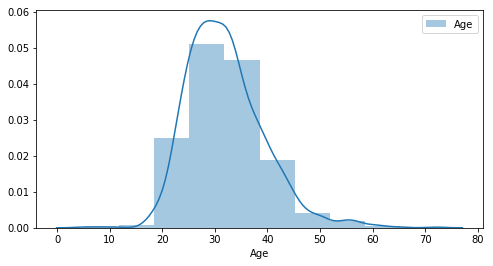

In [58]:
plt.figure(figsize=(8, 4))
sns.distplot(df.toPandas()["Age"], bins=10, label='Age')
plt.legend()
plt.show()

In [28]:
cols = df.schema.names
cols

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [39]:
for c in cols:
    df.select(c).describe().show()

+-------+-------------------+
|summary|          Timestamp|
+-------+-------------------+
|  count|               1259|
|   mean|               null|
| stddev|               null|
|    min|2014-08-27 11:29:31|
|    max|2016-02-01 23:04:31|
+-------+-------------------+

+-------+--------------------+
|summary|                 Age|
+-------+--------------------+
|  count|                1259|
|   mean| 7.942814831135821E7|
| stddev|2.8182994429819684E9|
|    min|             -1726.0|
|    max|     9.9999999999E10|
+-------+--------------------+

+-------+------------------+
|summary|            Gender|
+-------+------------------+
|  count|              1259|
|   mean|              null|
| stddev|              null|
|    min|A little about you|
|    max|             woman|
+-------+------------------+

+-------+---------+
|summary|  Country|
+-------+---------+
|  count|     1259|
|   mean|     null|
| stddev|     null|
|    min|Australia|
|    max| Zimbabwe|
+-------+---------+

+-----

In [43]:
df.select("Age").distinct().show()

+-------+
|    Age|
+-------+
|    8.0|
|  329.0|
|  -29.0|
|   49.0|
|   -1.0|
|   29.0|
|   47.0|
|-1726.0|
|   42.0|
|   44.0|
|   35.0|
|   62.0|
|   18.0|
|   39.0|
|   37.0|
|   34.0|
|   25.0|
|   36.0|
|   41.0|
|   23.0|
+-------+
only showing top 20 rows



In [44]:
df.groupby(df["Age"]).count().show()

+-------+-----+
|    Age|count|
+-------+-----+
|    8.0|    1|
|  329.0|    1|
|  -29.0|    1|
|   49.0|    4|
|   -1.0|    1|
|   29.0|   85|
|   47.0|    2|
|-1726.0|    1|
|   42.0|   20|
|   44.0|   11|
|   35.0|   55|
|   62.0|    1|
|   18.0|    7|
|   39.0|   33|
|   37.0|   43|
|   34.0|   65|
|   25.0|   61|
|   36.0|   37|
|   41.0|   21|
|   23.0|   51|
+-------+-----+
only showing top 20 rows



In [46]:
df.groupby(df['Gender']).count().show()

+------------+-----+
|      Gender|count|
+------------+-----+
|  non-binary|    1|
|        Make|    4|
|           F|   38|
| Genderqueer|    1|
|         Man|    2|
|  Male (CIS)|    1|
|           m|   34|
|     Female |    2|
|     Agender|    1|
|         Mal|    1|
|           f|   15|
|       maile|    1|
|Trans-female|    1|
|         Nah|    1|
|  Cis Female|    1|
|       woman|    1|
|      Female|  121|
|     Cis Man|    1|
|      female|   62|
|           M|  116|
+------------+-----+
only showing top 20 rows



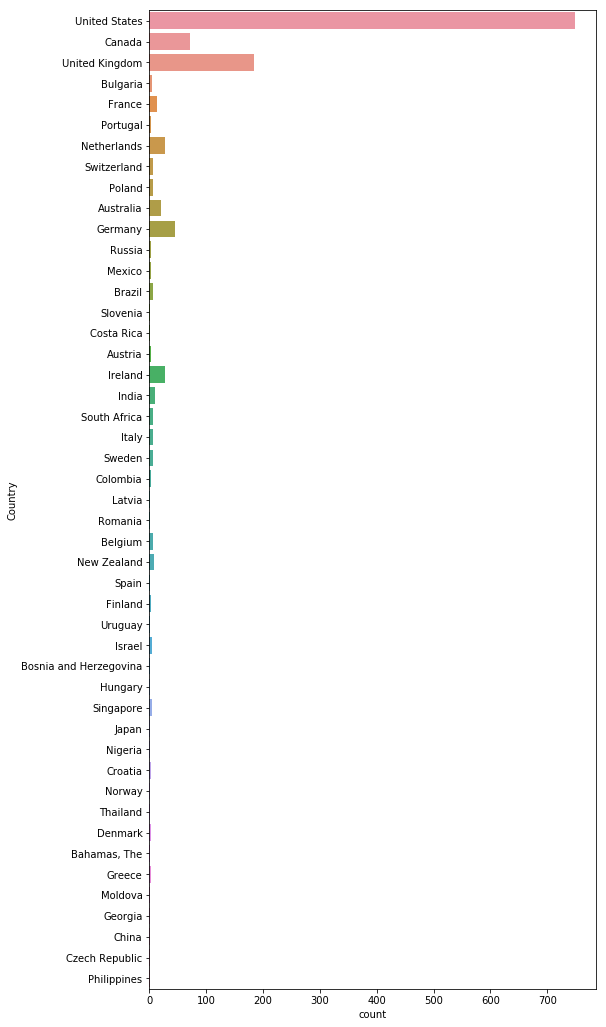

In [61]:
temp = df.toPandas()
plt.figure(figsize=(8, 18))
sns.countplot(y = temp['Country'])
plt.show()


In [49]:
#df.where(df['Country']=='United States').crosstab('Age','Gender').show()

In [66]:
!pip install plotly

    100% |████████████████████████████████| 7.3MB 2.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [69]:
import plotly as py
py.__version__

'4.3.0'

In [72]:
import plotly.graph_objects as go





# to do

In [ ]:
for each traitement en parallélisé en map execute sans reduce

In [ ]:
map, write file, registeredtemptable

In [64]:
sns.__version__

'0.9.0'

In [54]:
test = {'col1': [1, 2], 'col2': [3, 4]}
test = pd.DataFrame(data=test)
test

,col1,col2
0,1,3
1,2,4


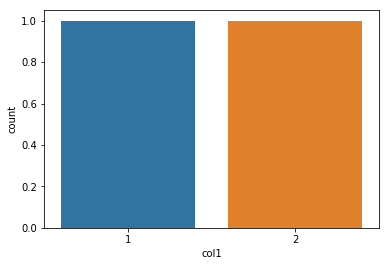

In [55]:
sns.countplot(test.col1)